In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
data=pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
le=LabelEncoder()
data['ShelveLoc']=le.fit_transform(data['ShelveLoc'])
data['Urban']=le.fit_transform(data['Urban'])
data['US']=le.fit_transform(data['US'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [7]:
data['Sales']=data['Sales'].map(lambda x:1 if x>5 else 0)

In [8]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int64
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int64
 10  US           400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [10]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.062963,0.076367,0.167921,-0.015910,-0.267287,0.233682,-0.185434,0.034645,-0.009942,0.061817
CompPrice,0.062963,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.076367,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.167921,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,-0.015910,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.267287,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.233682,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.185434,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,0.034645,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.009942,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


<Axes: xlabel='Sales', ylabel='count'>

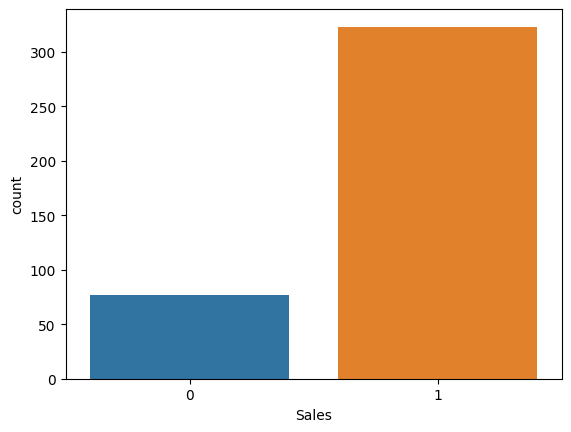

In [11]:
import seaborn as sns
sns.countplot(x=data['Sales'])

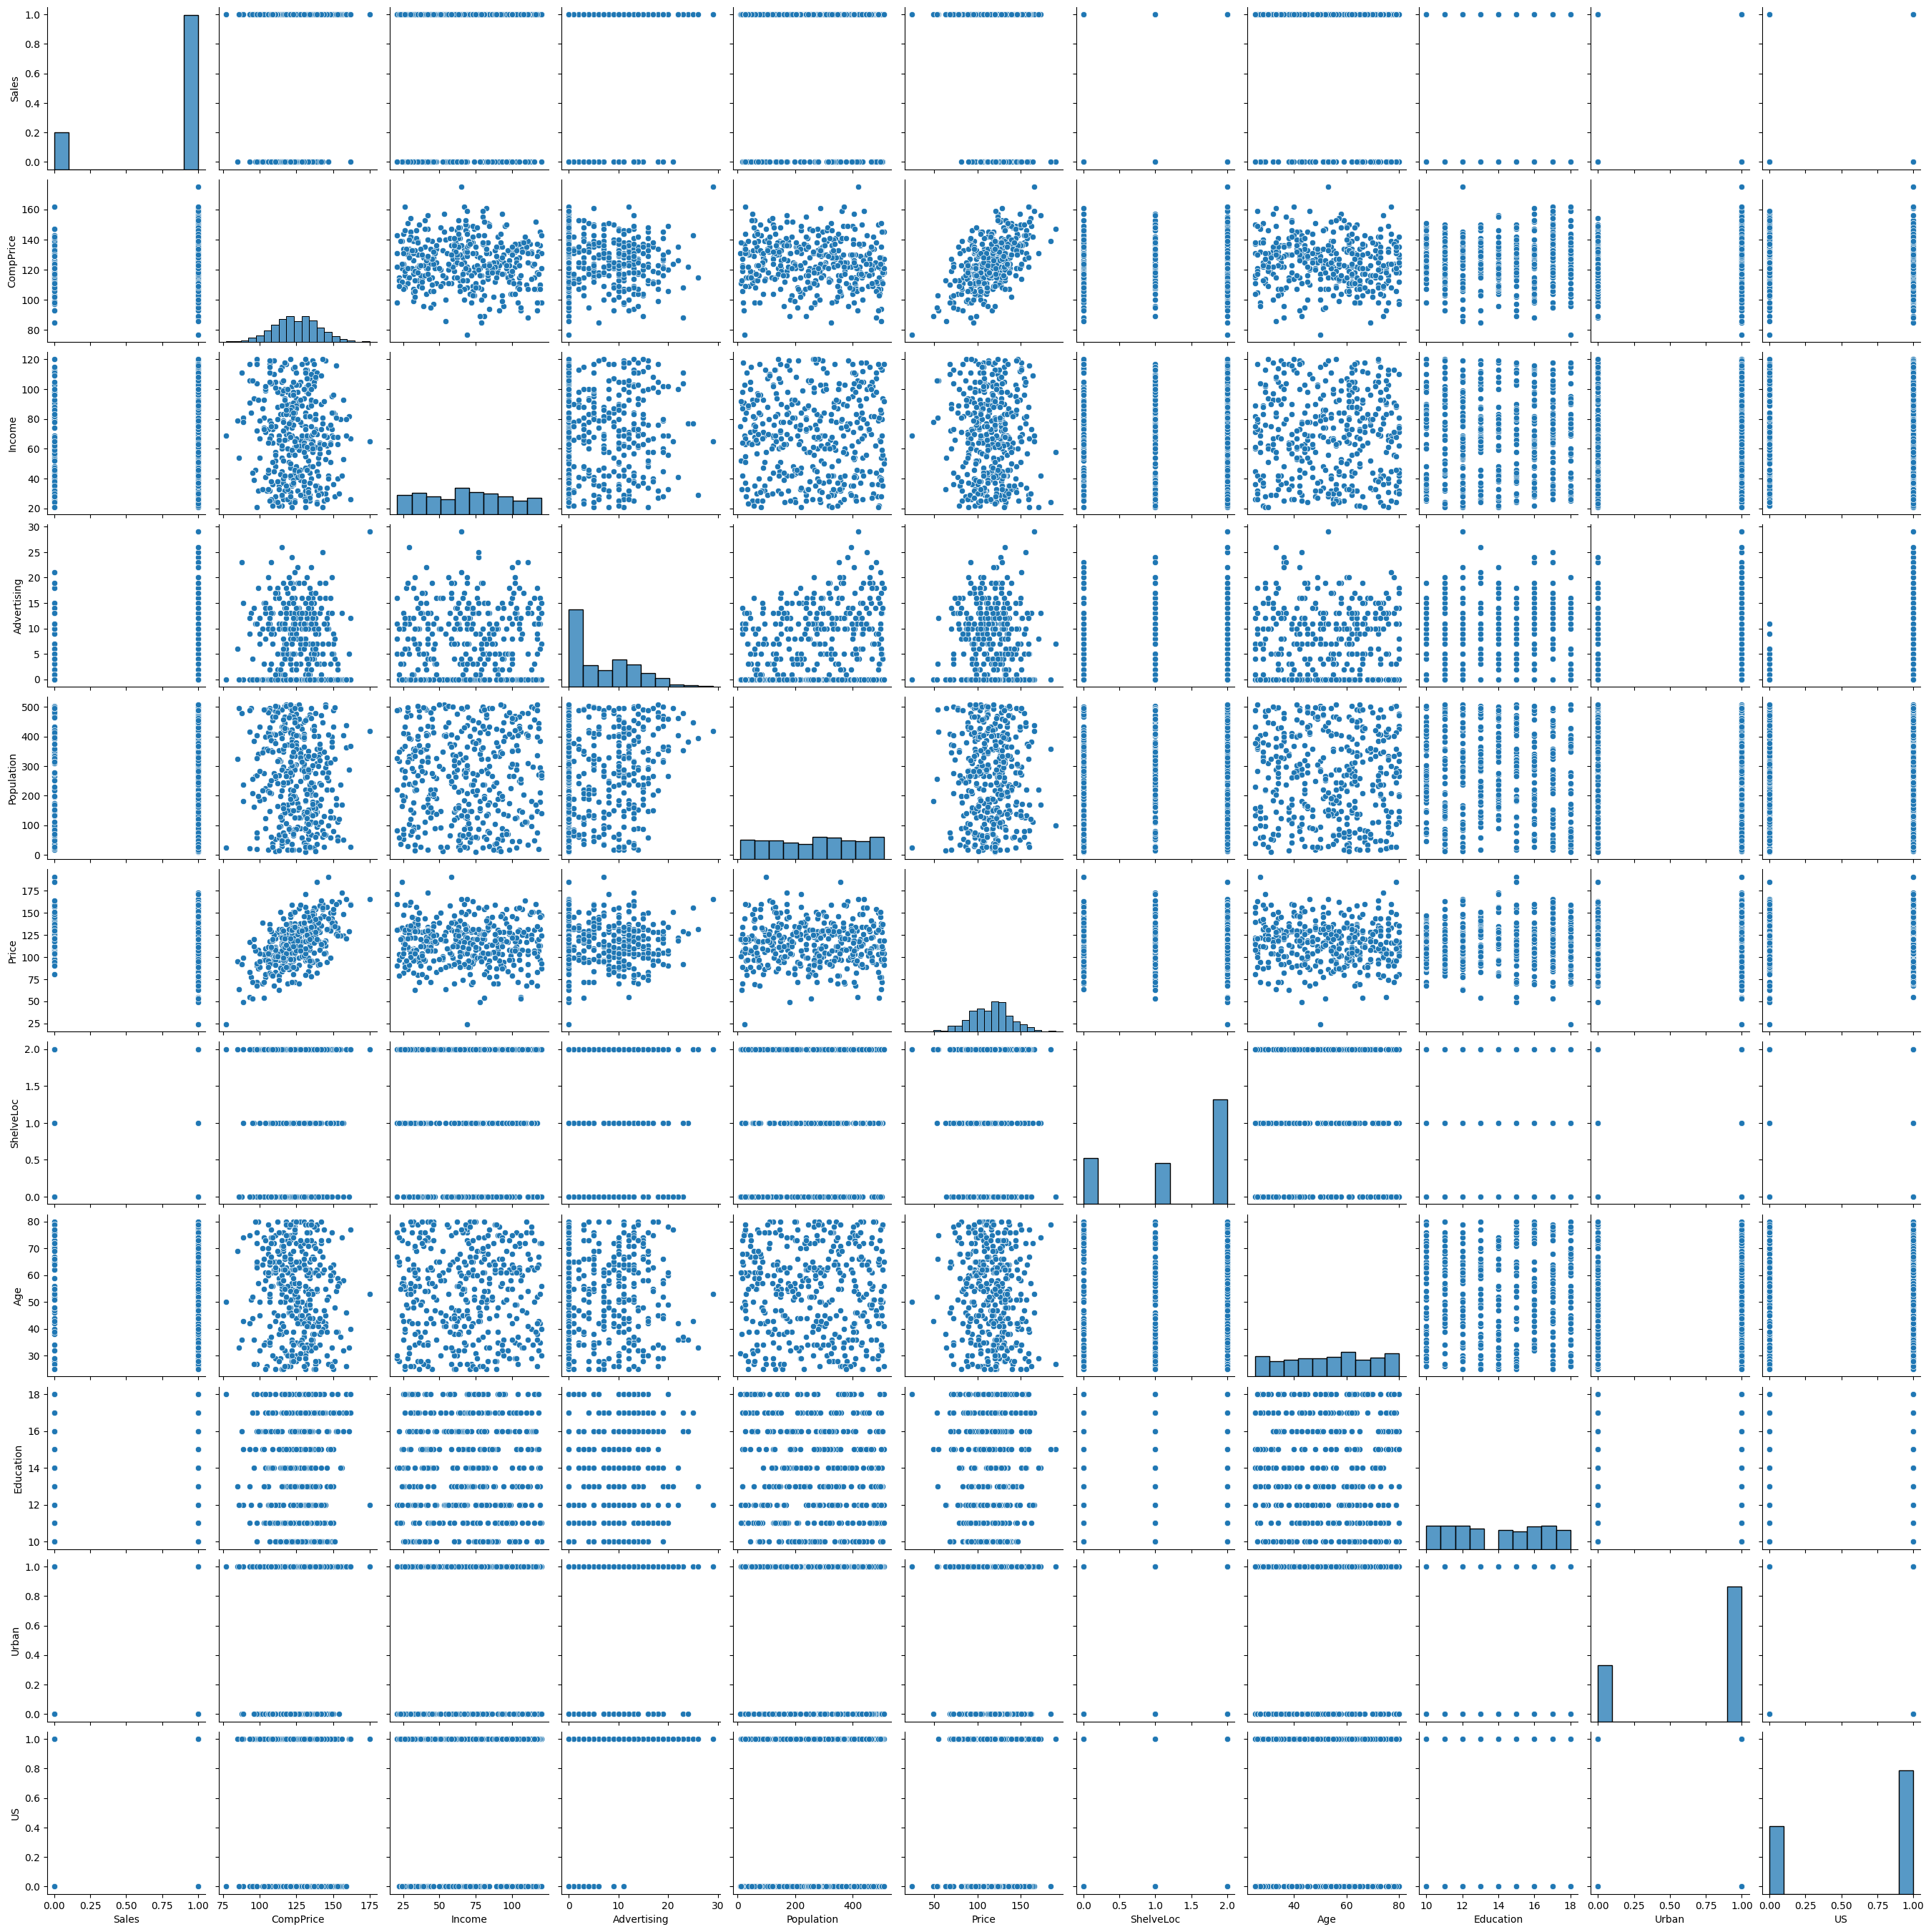

In [12]:
sns.pairplot(data)

In [13]:
len(data['Sales'].unique())

2

In [14]:
x=data.iloc[:,1:]
y=data.iloc[:,0]
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Sales, Length: 400, dtype: int64

In [15]:
x.shape

(400, 10)

In [16]:
y.shape

(400,)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
x_train.shape

(320, 10)

In [19]:
y_train.shape

(320,)

In [20]:
x_test.shape

(80, 10)

In [21]:
y_test.shape

(80,)

In [22]:
model=DecisionTreeClassifier()


In [23]:
grid_search=GridSearchCV(estimator=model,param_grid={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]})
grid_search

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [24]:
grid_search.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [25]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [26]:
grid_search.best_score_

0.8225

In [27]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

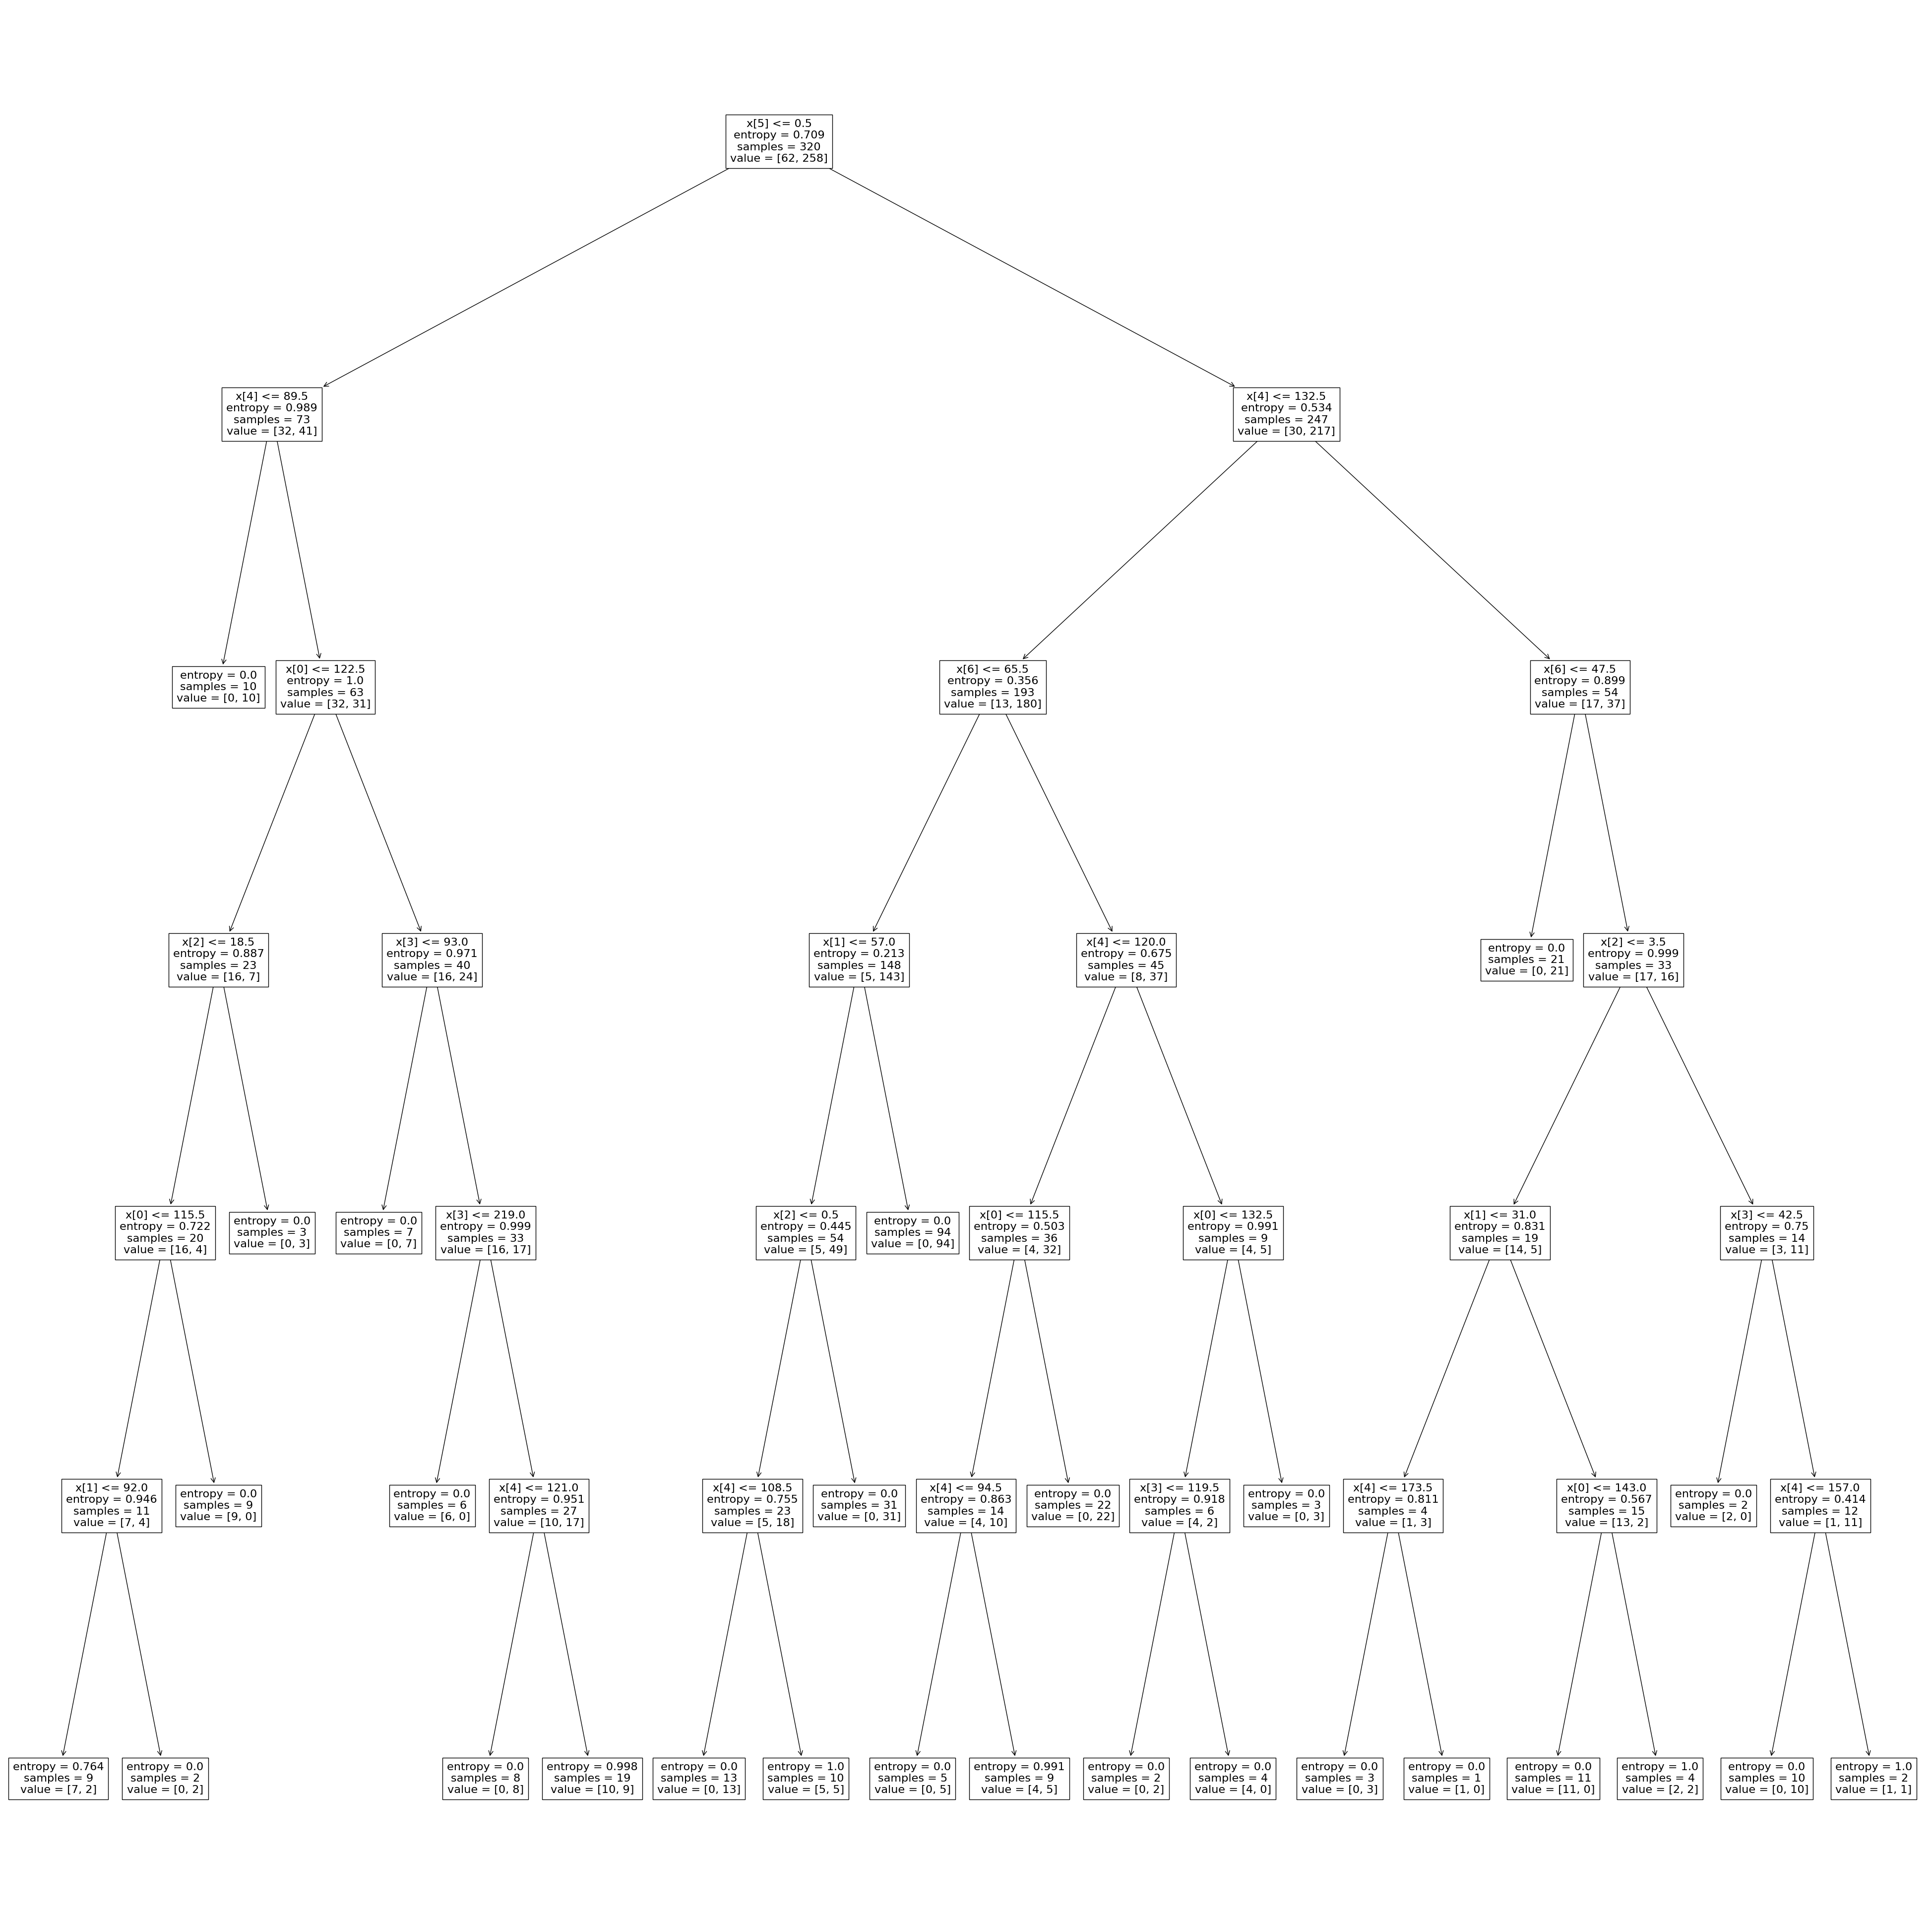

In [28]:
plt.subplots(figsize=(50,50))
tree.plot_tree(model);

# Testing model

In [29]:
y_pred_test=model.predict(x_test)
y_pred_test

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [30]:
y_pred_train=model.predict(x_train)
y_pred_train

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [31]:
pred=pd.DataFrame({'Actual':y_test,'Prediction':y_pred_test})
pred

,Actual,Prediction
398,1,0
126,1,0
353,1,1
340,1,0
296,1,1
...,...,...
351,1,1
366,1,1
360,1,1
396,1,1


In [32]:
accuracy_score(y_train,y_pred_train)

0.928125

In [33]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        62
           1       0.98      0.93      0.95       258

    accuracy                           0.93       320
   macro avg       0.87      0.93      0.89       320
weighted avg       0.94      0.93      0.93       320



In [34]:
accuracy_decisionmodel=accuracy_score(y_test,y_pred_test)
accuracy_decisionmodel

0.7125

In [35]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.33      0.53      0.41        15
           1       0.88      0.75      0.81        65

    accuracy                           0.71        80
   macro avg       0.60      0.64      0.61        80
weighted avg       0.77      0.71      0.73        80



# AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
model_ada=AdaBoostClassifier()
model_ada.fit(x_train,y_train)

AdaBoostClassifier()

In [37]:
y_pred_train=model_ada.predict(x_train)
y_pred_train

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [38]:
y_pred_test=model_ada.predict(x_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [39]:
accuracy_score(y_pred_train,y_train)

0.940625

In [40]:
accuracy_adaboost=accuracy_score(y_pred_test,y_test)
accuracy_adaboost

0.9

# GradientBoostClassifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
model_grad=GradientBoostingClassifier()
model_grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [42]:
y_pred_train=model_grad.predict(x_train)
y_pred_test=model_grad.predict(x_test)

In [43]:
accuracy_score(y_train,y_pred_train)

0.996875

In [44]:
accuracy_gradient=accuracy_score(y_test,y_pred_test)
accuracy_gradient

0.85

# FraudCheck

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'])


In [6]:
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Taxable.Income           600 non-null    int64
 1   City.Population          600 non-null    int64
 2   Work.Experience          600 non-null    int64
 3   Undergrad_NO             600 non-null    uint8
 4   Undergrad_YES            600 non-null    uint8
 5   Marital.Status_Divorced  600 non-null    uint8
 6   Marital.Status_Married   600 non-null    uint8
 7   Marital.Status_Single    600 non-null    uint8
 8   Urban_NO                 600 non-null    uint8
 9   Urban_YES                600 non-null    uint8
dtypes: int64(3), uint8(7)
memory usage: 18.3 KB


In [8]:
data['Taxable.Income']=data['Taxable.Income'].map(lambda x:1 if x>30000 else 0)

In [9]:
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1,50047,10,1,0,0,0,1,0,1
1,1,134075,18,0,1,1,0,0,0,1
2,1,160205,30,1,0,0,1,0,0,1
3,1,193264,15,0,1,0,0,1,0,1
4,1,27533,28,1,0,0,1,0,1,0


<Axes: >

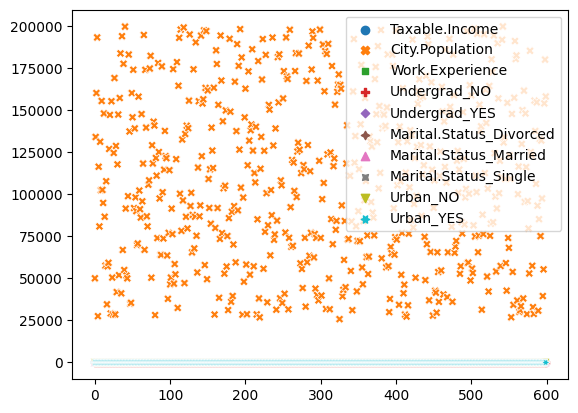

In [10]:
sns.scatterplot(data)

<ipython-input-11-946844e4f3c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Taxable.Income'])


<Axes: xlabel='Taxable.Income', ylabel='Density'>

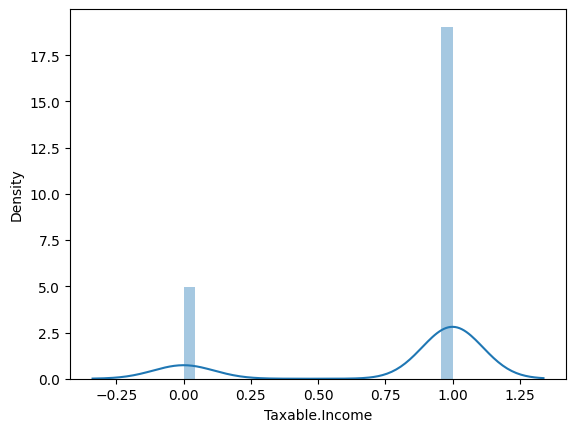

In [11]:
sns.distplot(data['Taxable.Income'])

In [12]:
x=data.iloc[:,1:]
y=data.iloc[:,0]
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

In [14]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

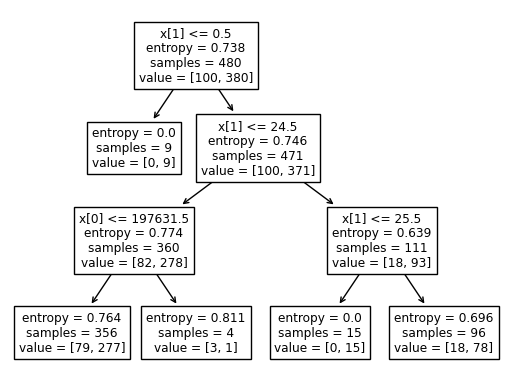

In [15]:
tree.plot_tree(model);

In [16]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
260,1,1
240,1,1
443,0,1
454,1,1
425,1,1
...,...,...
448,1,1
127,1,1
180,1,1
330,1,1


In [18]:
accuracy_entropy=accuracy_score(y_test,y_pred)
accuracy_entropy

0.7833333333333333

# Normalization

In [19]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [20]:
data=norm_func(data)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1.0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
595,1.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,1.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,1.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,1.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [21]:
x= data.iloc[:,1:]
y=data.iloc[:,0]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4230769230769231, 0.875, 'x[1] <= 0.083\nentropy = 0.738\nsamples = 480\nvalue = [100, 380]'),
 Text(0.15384615384615385, 0.625, 'x[0] <= 0.284\nentropy = 0.571\nsamples = 37\nvalue = [5, 32]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.23076923076923078, 0.375, 'x[0] <= 0.292\nentropy = 0.677\nsamples = 28\nvalue = [5, 23]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.605\nsamples = 27\nvalue = [4, 23]'),
 Text(0.6923076923076923, 0.625, 'x[1] <= 0.817\nentropy = 0.75\nsamples = 443\nvalue = [95, 348]'),
 Text(0.5384615384615384, 0.375, 'x[0] <= 0.988\nentropy = 0.778\nsamples = 326\nvalue = [75, 251]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.768\nsamples = 321\nvalue = [72, 249]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 0.85\nentropy = 0.66\nsamples = 117\

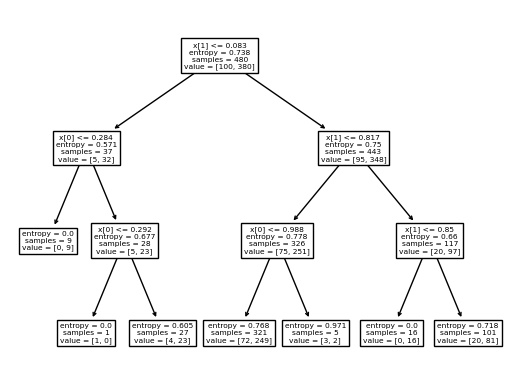

In [26]:
tree.plot_tree(model)

In [27]:
y_pred=model.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [28]:
df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
591,0.0,1.0
131,1.0,1.0
46,1.0,1.0
227,1.0,1.0
6,1.0,1.0
...,...,...
571,1.0,1.0
380,1.0,1.0
188,0.0,1.0
143,0.0,1.0


In [30]:
entropy_accuracy_norm=accuracy_score(y_test,y_pred)
entropy_accuracy_norm

0.8

In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_logistic=accuracy_score(y_test,y_pred)
accuracy_logistic

0.8

In [34]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)
y_pred=model_gini.predict(x_test)
accuracy_gini=accuracy_score(y_test,y_pred)
accuracy_gini*100

80.0